House Price Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [29]:
My_data = pd.read_csv("Data.csv")
New_data = My_data.drop(['SA12018_code','SA22018_code','SA22018_name','Unnamed: 0'],axis=1)

In [30]:
New_data.dtypes

Bedrooms             int64
Bathrooms          float64
Address             object
Land area           object
CV                   int64
Latitude           float64
Longitude          float64
SA1                  int64
0-19 years           int64
20-29 years          int64
30-39 years          int64
40-49 years          int64
50-59 years          int64
60+ years            int64
Suburbs             object
Population           int64
NZDep2018          float64
NZDep2018_Score    float64
URPopnSA1_2018       int64
dtype: object

In [31]:
New_data['Land area'] = New_data['Land area'].str.extract('(\d+)').astype(float)

In [32]:
New_data.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,NZDep2018,NZDep2018_Score,URPopnSA1_2018
count,1051.000000,1049.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,151.372978,5.063749,986.503330,179.914367
std,1.169412,0.992985,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,54.239853,2.913471,94.287255,71.059280
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,849.000000,3.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,120.000000,2.000000,918.000000,138.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,153.000000,5.000000,959.000000,174.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,183.000000,8.000000,1031.000000,210.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,429.000000,10.000000,1380.000000,789.000000


In [33]:
New_data[pd.isnull(New_data).any(axis=1)]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018,NZDep2018_Score,URPopnSA1_2018
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214.0,1250000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,9,2.0,911.0,252
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245.0,1100000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,9,2.0,911.0,252
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141.0,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,120,9.0,1122.0,156


Imputing Missing values by manually filling in the value and by imputing by using the mean of that column

In [34]:
New_data.at[568,'Suburbs']= "Great Barrier Island"

In [35]:
New_data['Bathrooms'] = New_data['Bathrooms'].fillna(New_data['Bathrooms'].mean())


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda0b91a908>,
      dtype=object)

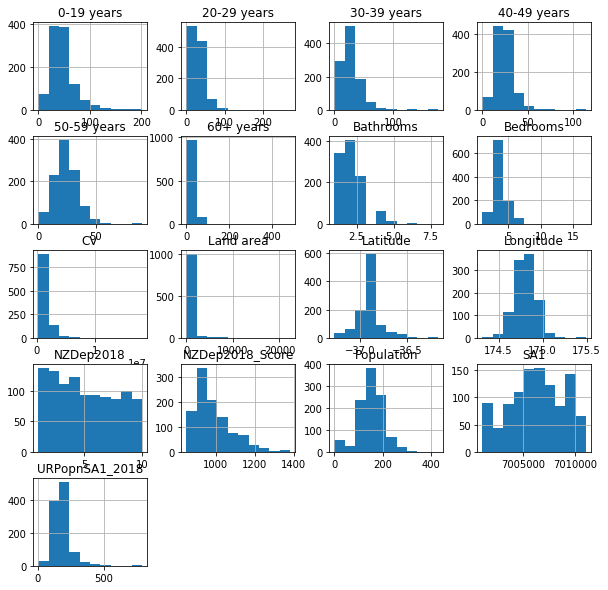

In [50]:
New_data.hist(figsize=(10,10))

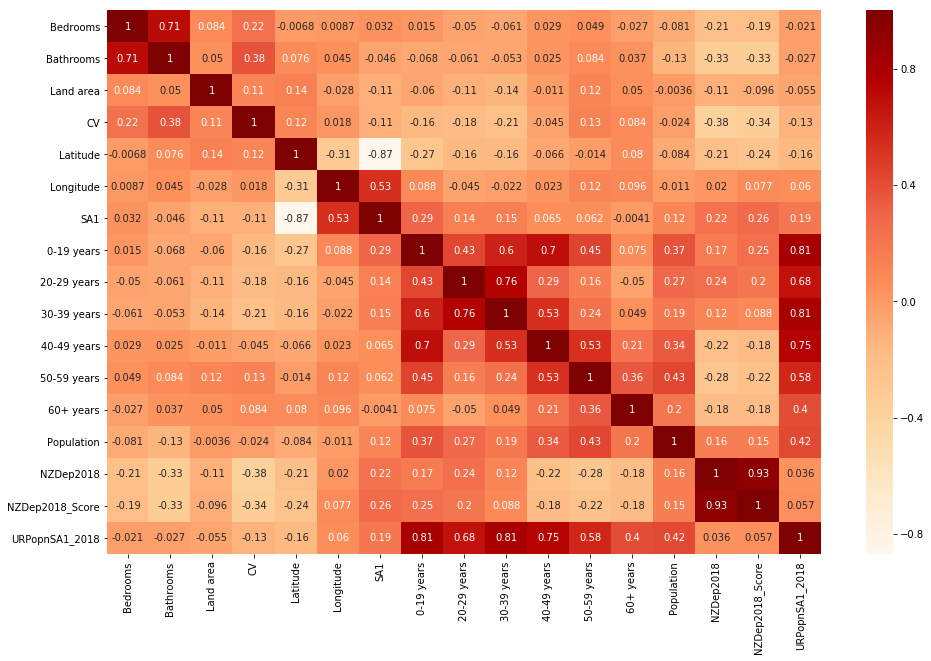

In [7]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = New_data.corr()
sns.heatmap(correlation_matrix,annot=True, cmap="OrRd")
plt.show()

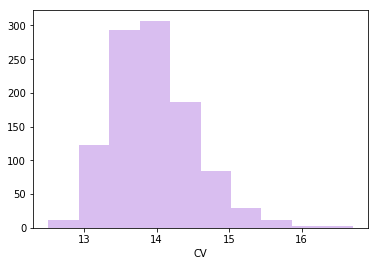

In [41]:
x = New_data.drop(['CV','Address','Suburbs','Longitude','Latitude','SA1'],axis =1)
y = np.log(New_data['CV'])
sns.distplot(y, kde=False, color='#A15EDB', bins=10)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
scaler_x = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler_x.fit_transform(x_train)
X_test_scaled = scaler_x.transform(x_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [44]:
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
y_pred = model.predict(X_test_scaled)

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(f'R^2 Test: {r2_score(y_test, y_pred)}')
print(f'Mean Absoulute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 Test: 0.42525406728259607
Mean Absoulute Error : 0.3198950796026587
Mean Squared Error: 0.42453171995825423


In [58]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 2
poly_features = PolynomialFeatures(degree = 2)
poly_reg =LinearRegression()
# Returns a transformed version of X with new combinations of features
x_train_poly = poly_features.fit_transform(X_train_scaled)
x_test_poly = poly_features.fit_transform(X_test_scaled)

In [59]:
poly_reg.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
y_pred = poly_reg.predict(x_test_poly)

R^2 Test: 0.3619046224058059
Mean Absoulute Error : 0.332598150100422
Mean Squared Error: 0.44731657525005303


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


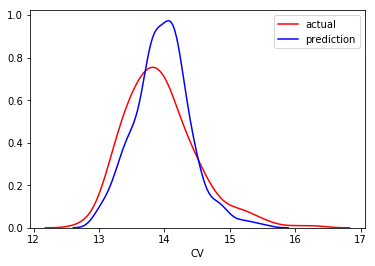

In [61]:
print(f'R^2 Test: {r2_score(y_test, y_pred)}')
print(f'Mean Absoulute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)